In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020?select=IPL+Matches+2008-2020.csv

ipl_df = pd.read_csv('IPL Matches 2008-2020.csv')
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
ipl_df.shape

(816, 17)

In [4]:
ipl_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [5]:
ipl_df.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

## Cleaning Data

In [6]:
# replacing the null values of method columns with 'Not D/L'

ipl_df.method.fillna(value='Not D/L', inplace=True)
ipl_df.method.value_counts()

Not D/L    797
D/L         19
Name: method, dtype: int64

In [7]:
# replacing the null values of city based on venue 

#ipl_df[(ipl_df.city.isnull()) & (ipl_df.venue.str.startswith('Sharjah'))]

ipl_df.loc[(ipl_df.venue.str.startswith('Dubai')) & (ipl_df.city.isnull()) , 'city'] = 'Dubai'
ipl_df.loc[(ipl_df.venue.str.startswith('Sharjah')) & (ipl_df.city.isnull()) , 'city'] = 'Sharjah'

# replacing the null values of result_margin to 0 as the result is 'tie'

ipl_df.loc[(ipl_df.result_margin.isnull()) & (ipl_df.result == 'tie'), 'result_margin'] = 0

# deleting the rows for which result column is null as they are not useful for analysis

ipl_df.drop(ipl_df[ipl_df['result'].isnull()].index, inplace=True)
#ipl_df[ipl_df['result'].isnull()].index

# Change the datatype of date column from object to date

ipl_df['date'] = pd.to_datetime(ipl_df['date'])

In [8]:
ipl_df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [9]:
ipl_df.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [10]:
ipl_df['year'] = pd.DatetimeIndex(ipl_df['date']).year


### Plotting

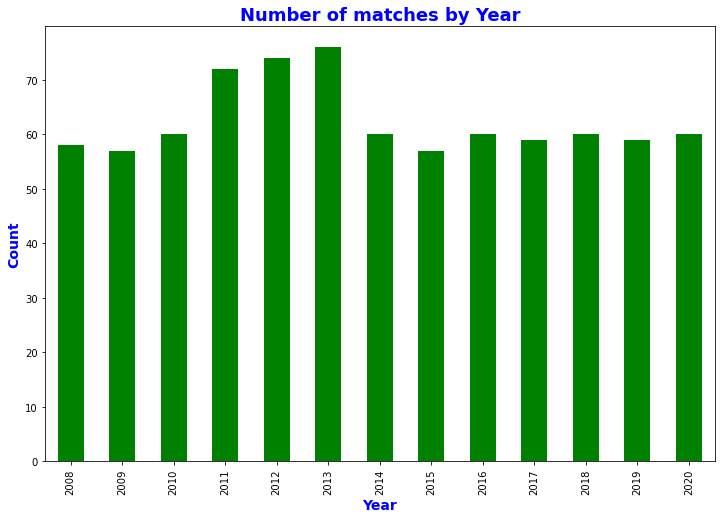

In [11]:
plt.figure(figsize=(12,8))
ipl_df.year.value_counts().sort_index(ascending=True).plot(kind='bar', color='g')
plt.title('Number of matches by Year', color='blue', fontweight='bold', size='18')
plt.xlabel('Year', color='blue', fontweight='bold', size='14')
plt.ylabel('Count', color='blue', fontweight='bold', size='14')
plt.show()

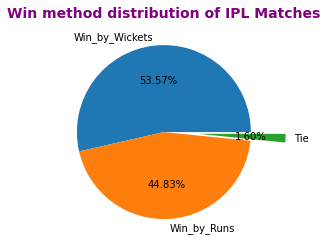

In [12]:

wickets = ipl_df.loc[ipl_df['result' ] == 'wickets'].count()[0]
runs = ipl_df.loc[ipl_df['result' ] == 'runs'].count()[0]
tie = ipl_df.loc[ipl_df['result' ] == 'tie'].count()[0]

lables=['Win_by_Wickets', 'Win_by_Runs', 'Tie']
explode=[0, 0, .4]

plt.pie([wickets, runs, tie], labels=lables, autopct='%.2f%%', explode=explode, pctdistance=.6)
plt.title('Win method distribution of IPL Matches', color='purple', fontweight='bold', fontsize='14')
plt.show()

In [13]:
ipl_df.result.value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

Text(0, 0.5, 'Team')

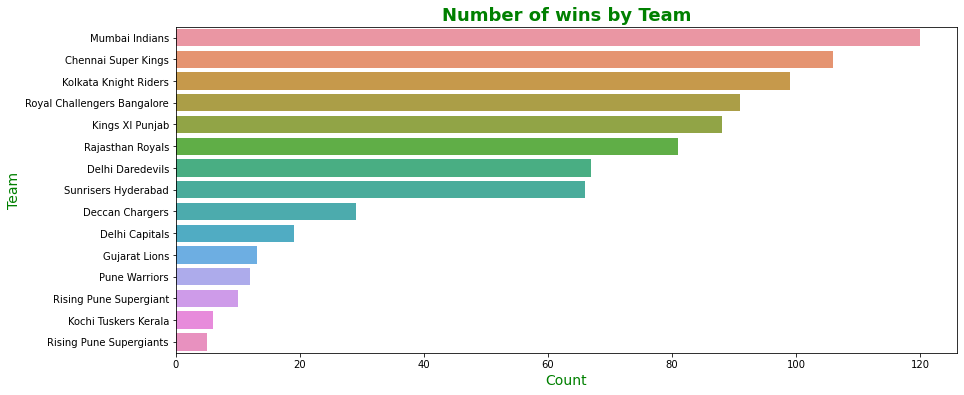

In [14]:
team_winner = ipl_df.winner.value_counts().sort_values(ascending=False)
#doubt - winners_df = pd.DataFrame(team_winner, columns=['Count'])
winners_df = pd.DataFrame(team_winner)

plt.figure(figsize=(14,6))
sns.barplot(x=winners_df.winner, y=winners_df.index, data=winners_df, orient='h')
plt.title('Number of wins by Team', size=18, color='g', fontweight='bold', loc='center')
plt.xlabel('Count', size=14, color='g')
plt.ylabel('Team', size=14, color='g')

In [15]:
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Not D/L,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Not D/L,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Not D/L,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Not D/L,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Not D/L,BF Bowden,K Hariharan,2008


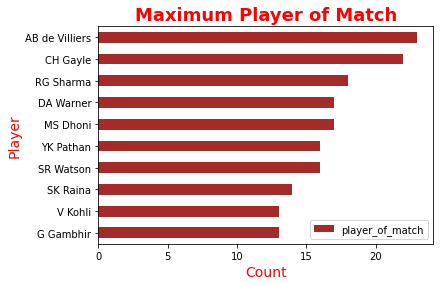

In [16]:
top_players = ipl_df.player_of_match.value_counts().sort_values(ascending=False)
top_players_df = pd.DataFrame(top_players)

top_players_df[:10].sort_values(by='player_of_match', ascending=True).plot(kind='barh', color='brown')
plt.title('Maximum Player of Match',size=18, color='r', fontweight='bold', loc='center')
plt.xlabel('Count', size=14, color='r')
plt.ylabel('Player', size=14, color='r')
plt.show()

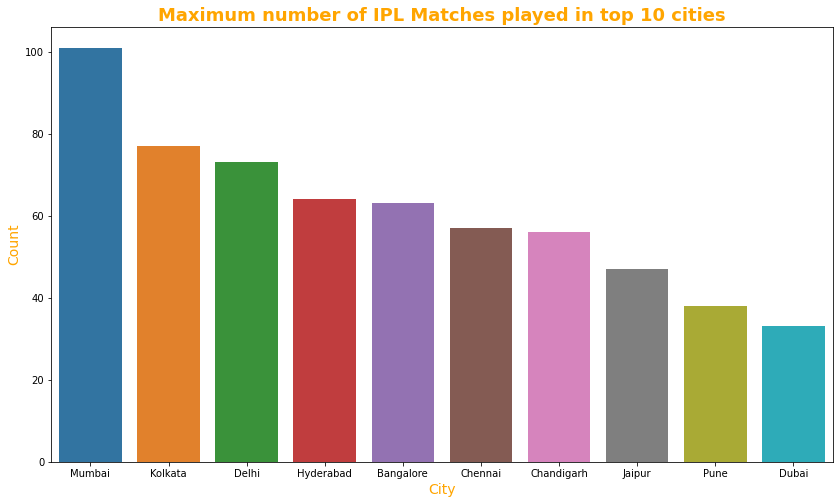

In [17]:
# ipl_df.city.value_counts().keys()
top_10_cities = pd.DataFrame(ipl_df.city.value_counts().sort_values(ascending=False)[:10])
top_10_cities
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_cities.index, y=top_10_cities.city, data=top_10_cities )
plt.title('Maximum number of IPL Matches played in top 10 cities',size=18, color='orange', fontweight='bold', loc='center')
plt.xlabel('City', size=14, color='orange')
plt.ylabel('Count', size=14, color='orange')
plt.show()



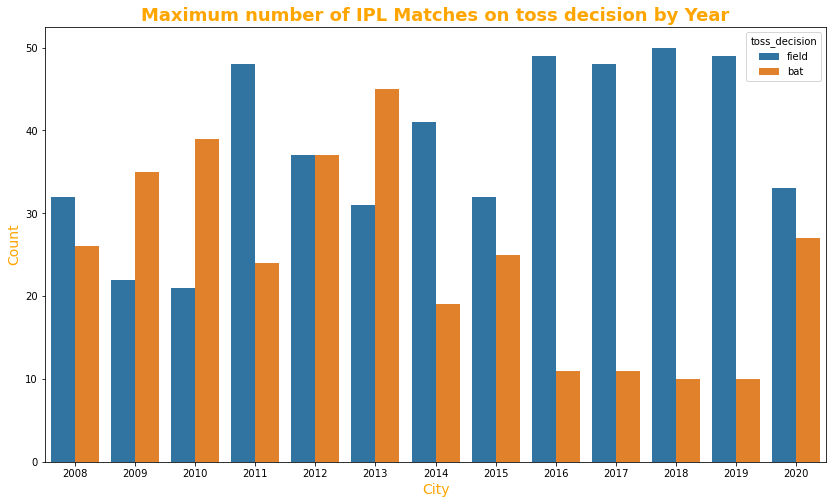

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(x='year', data=ipl_df, hue=ipl_df.toss_decision)
plt.title('Maximum number of IPL Matches on toss decision by Year',size=18, color='orange', fontweight='bold', loc='center')
plt.xlabel('City', size=14, color='orange')
plt.ylabel('Count', size=14, color='orange')
plt.show()

In [19]:
# number of matches won by the toss_winner
 
np.sum(ipl_df['toss_winner'] == ipl_df['winner'])

418

In [21]:
sns.set(rc={'figure.figsize': (13,8)})
#sns.boxplot(x='')

In [22]:
unpickle = pd.read_pickle('./movie_pickle.pkl')
unpickle

,year
2020,690
2019,2497
2018,2892
2017,2953
2016,2854
